##### library

In [3]:
import os
import glob
import pandas as pd
import re
import collections
import csv


import matplotlib.pyplot as plt


import seaborn as sns
import numpy as np

### <1-1> (Saliva3) Compare a list of microbiome (gut) with another list of beneficial or harmful or commensal bacteria 
- Date : 23/03/20
- Author : Jeesu Lee

### step1. transform list into the dataframe

In [4]:
### transform list into the dataframe
df_gut_bacteria = pd.read_csv("list_gut_bacteria.csv")
df_gut_bacteria

,species,type,note,link
0,Clostridium bolteae,harmful,NaN,https://www.researchgate.net/publication/33691...
1,Clostridium indolis,harmful,NaN,https://www.researchgate.net/publication/33691...
2,Clostridium ramosum,harmful,NaN,https://www.researchgate.net/publication/33691...
3,Clostridium difficile,harmful,NaN,https://www.researchgate.net/publication/33691...
4,Clostridium perfringens,harmful,NaN,https://www.researchgate.net/publication/33691...
...,...,...,...,...
521,Campylobacter showae,harmful,NaN,https://www.frontiersin.org/articles/10.3389/f...
522,Cronobacter sakazakii*,harmful,NaN,https://www.frontiersin.org/articles/10.3389/f...
523,Streptococcus pneumoniae*,harmful,NaN,https://www.frontiersin.org/articles/10.3389/f...
524,Streptococcus suis,harmful,NaN,https://www.frontiersin.org/articles/10.3389/f...


In [5]:
df_bartex_saliva3 = pd.read_csv("Saliva3.csv")
df_bartex_saliva3

,Unnamed: 0,superkingdom,Unnamed: 2,Unnamed: 3,phylum,Unnamed: 5,Unnamed: 6,genus
0,Bacteria,8253.0,NaN,Chlorophyta,707.0,NaN,Cucurbita,985
1,Eukaryota,5921.0,NaN,Planctomycetes,218.0,NaN,unknown,3018
2,Viruses,2952.0,NaN,Cyanobacteria,548.0,NaN,Ostreococcus,318
3,Archaea,1393.0,NaN,Proteobacteria,1120.0,NaN,Vibrio,688
4,NaN,NaN,NaN,Uroviricota,2000.0,NaN,Pseudomonas,277
...,...,...,...,...,...,...,...,...
144,NaN,NaN,NaN,NaN,NaN,NaN,Ornithorhynchus,2
145,NaN,NaN,NaN,NaN,NaN,NaN,Nitrosopumilus,2
146,NaN,NaN,NaN,NaN,NaN,NaN,Anas,1
147,NaN,NaN,NaN,NaN,NaN,NaN,Equus,1


### step2. compare 'list of gut bacteria' with 'bartex saliva1 phylum' except Nan value

In [ ]:
### delete the Nan value
df_gut_compared_saliva3 = df_bartex_saliva3[df_bartex_saliva3['Unnamed: 3'].notna()]
df_gut_compared_saliva3

In [7]:
### compare 'list of gut bacteria' with 'bartex saliva1 phylum'
for i in range(len(df_gut_compared_saliva3)):
    print(df_gut_bacteria[df_gut_bacteria['species'].str.contains(df_gut_compared_saliva3.iloc[i][3])])

Empty DataFrame
Columns: [species, type, note, link]
Index: []
Empty DataFrame
Columns: [species, type, note, link]
Index: []
Empty DataFrame
Columns: [species, type, note, link]
Index: []
                             species     type  \
8  Proteobacteria (escherichia coli)  harmful   

                              note  \
8  not sure, might not be reliable   

                                                link  
8  https://www.frontiersin.org/articles/10.3389/f...  
Empty DataFrame
Columns: [species, type, note, link]
Index: []
          species     type                             note  \
14  Bacteroidetes  harmful  not sure, might not be reliable   

                                                 link  
14  https://www.frontiersin.org/articles/10.3389/f...  
Empty DataFrame
Columns: [species, type, note, link]
Index: []
                                             species     type  \
7  Firmicutes (Faecalibacterium praunsnitzii, Clo...  harmful   

                             

### <1-2> (Saliva3) Count how many unique phylum in bartex which compared with list of gut microbiome

### step1. import file

In [9]:
### change path to import nanopore classification csv files
path = './'
files_list = glob.glob(path + 'bertax_out_*')
file_now = files_list[2]

### separate the columns by at least two consecutive whitespace characters
wimp_df = pd.read_csv(file_now, sep = '\s{2,}')

C:\Users\intco\AppData\Local\Temp\ipykernel_9616\3514793968.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  wimp_df = pd.read_csv(file_now, sep = '\s{2,}')


### step2. select the 'specific variabale' only from phylum

- 'Proteobacteria' : 1120

In [11]:
### specific variable : 'Proteobacteria'
specific_Proteobacteria = 'Proteobacteria'

### select 'Proteobacteria' only from phylum
specific_Proteobacteria_Saliva3 = wimp_df[wimp_df['phylum'].str.contains(specific_Proteobacteria)]

### create dataframe
Saliva3_specific_Proteobacteria_df = pd.DataFrame(specific_Proteobacteria_Saliva3)
Saliva3_specific_Proteobacteria_df


,id,superkingdom,phylum,genus
4,e02000e6-1e96-4148-922a-3456bcf85231|AJL462_pa...,Bacteria (65%),Proteobacteria (56%),Pseudomonas (65%)
13,4aa371b9-2d7a-489d-8670-89ce38be12ec|AJL462_pa...,Bacteria (82%),Proteobacteria (24%),Roseiflexus (82%)
49,0b280eab-e6d7-40d2-acac-ffe493b7e6b2|AJL462_pa...,Bacteria (100%),Proteobacteria (99%),unknown (84%)
52,0d361eb2-651a-4bb7-a50e-1dd568acee41|AJL462_pa...,Bacteria (99%),Proteobacteria (55%),Acidithiobacillus (53%)
55,271f6809-3a02-4e99-8f88-92737d5016cd|AJL462_pa...,Bacteria (100%),Proteobacteria (100%),unknown (91%)
...,...,...,...,...
18428,aba6a8b2-3f0d-468b-bf40-8e3a18021ba4|ATJ376_pa...,Bacteria (82%),Proteobacteria (37%),Helianthus (17%)
18450,bf6d53c9-6ee0-4282-a498-3841f1002b23|ATJ376_pa...,Bacteria (83%),Proteobacteria (74%),Salinisphaera (56%)
18451,8c328c10-5940-4d14-ac67-72f1cb204269|ATJ376_pa...,Bacteria (100%),Proteobacteria (97%),Neisseria (100%)
18492,ba2b6cf3-7762-49c7-9552-ae6be013763a|ATJ376_pa...,Bacteria (99%),Proteobacteria (95%),unknown (36%)


- Bacteroidetes : 1633

In [13]:
### specific variable : Bacteroidetes
specific_Bacteroidetes = 'Bacteroidetes'

### select 'Bacteroidetes' only from phylum
specific_Bacteroidetes_Saliva3 = wimp_df[wimp_df['phylum'].str.contains(specific_Bacteroidetes)] 

### create dataframe
Saliva3_specific_Bacteroidetes_df = pd.DataFrame(specific_Bacteroidetes_Saliva3)
Saliva3_specific_Bacteroidetes_df

,id,superkingdom,phylum,genus
7,bff1aa4a-8a87-4f56-b24b-c9c9864881c4|AJL462_pa...,Bacteria (89%),Bacteroidetes (79%),unknown (31%)
9,4c2aa229-143c-469e-94bc-0ca628703353|AJL462_pa...,Bacteria (98%),Bacteroidetes (64%),Candidatus Kuenenia (43%)
18,cdecade9-9dd4-4a4c-8421-ce5b24db5aef|AJL462_pa...,Bacteria (100%),Bacteroidetes (100%),unknown (97%)
21,725a8130-0138-4f67-8a13-fb8da358ec5d|AJL462_pa...,Bacteria (71%),Bacteroidetes (48%),Rhinatrema (20%)
24,204fe22e-065e-48c3-8cd8-4721837d688c|AJL462_pa...,Bacteria (71%),Bacteroidetes (27%),Neisseria (29%)
...,...,...,...,...
18475,7cbc07cc-72b3-499a-b473-9a7c23bcac16|ATJ376_pa...,Bacteria (57%),Bacteroidetes (53%),Leptospira (47%)
18478,a9f71033-6e30-41ee-8fb5-509b571bf087|ATJ376_pa...,Bacteria (72%),Bacteroidetes (24%),Ooceraea (14%)
18479,75df5ef5-7968-44a5-b986-d3719d3977ff|ATJ376_pa...,Bacteria (99%),Bacteroidetes (70%),unknown (74%)
18482,a2164f70-c2e4-4a79-b903-79bda5bbebd3|ATJ376_pa...,Bacteria (100%),Bacteroidetes (98%),unknown (99%)


### step3. create file (harmful_bacteria_from_samples)

### <2> (Saliva3) Compare a list of microbiome (saliva) with another list of beneficial or harmful or commensal bacteria
- Date : 23/03/20
- Author : Jeesu Lee

In [ ]:
df_saliva_bacteria = pd.read_csv("list_saliva_bacteria.csv")
df_saliva_bacteria

In [ ]:
df_bartex_saliva3 = pd.read_csv("Saliva3.csv")
df_bartex_saliva3

In [17]:
df_saliva_compared_saliva3 = df_bartex_saliva3[df_bartex_saliva3['Unnamed: 3'].notna()]

In [ ]:
for i in range(len(df_saliva_compared_saliva3)):
    print(df_saliva_bacteria[df_saliva_bacteria['species'].str.contains(df_saliva_compared_saliva3.iloc[i][3])])


### <3> (Saliva3_superkingdom) The data depicted in graphical format : donut graph
- Date : 23/04/18
- Author : Jeesu Lee

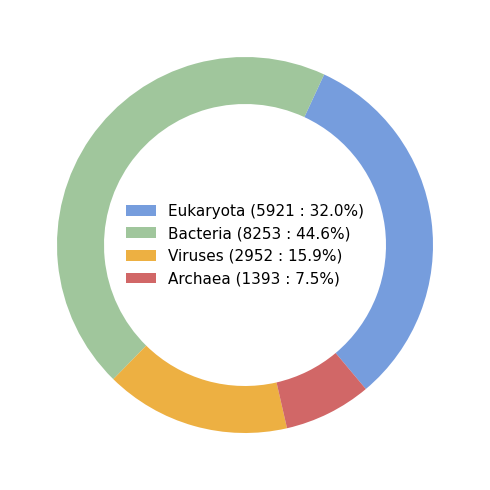

In [14]:
# create data
sizes = [5921, 8253, 2952, 1393]
labels = ['Eukaryota', 'Bacteria', 'Viruses', 'Archaea']
colors = ['#5E8CD8D9', '#8FBC8BD9', '#EAA221D9', '#C94C4CD9']

# create graph
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(sizes, wedgeprops=dict(width=0.25), startangle=-50, labels=None,
                                  textprops={'fontsize': 12}, colors=colors, pctdistance=0.75, autopct=' ')

# create legend
legend = plt.legend(labels=labels, loc='center', edgecolor='None', prop={'size': 11}, framealpha=0)

# add percentage on the lengend
for i, text in enumerate(legend.get_texts()):
    text.set_text(text.get_text() + f" ({sizes[i]} : {sizes[i] / sum(sizes) * 100:.1f}%)")

# save as jpg
plt.tight_layout()
plt.savefig("superkingdom_saliva3_exactnumber_percentage.jpg")